In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
hc_df = pd.read_csv("hate_crime.csv")

c:\users\cralx2k\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Dataset source:

https://crime-data-explorer.app.cloud.gov/pages/downloads#nibrs-downloads

Look for "Hate Crime Statistics Annual Reports".

# Information about the dataset

In [3]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219073 entries, 0 to 219072
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219073 non-null  int64  
 1   DATA_YEAR                 219073 non-null  int64  
 2   ORI                       219073 non-null  object 
 3   PUB_AGENCY_NAME           219073 non-null  object 
 4   PUB_AGENCY_UNIT           6427 non-null    object 
 5   AGENCY_TYPE_NAME          219073 non-null  object 
 6   STATE_ABBR                219073 non-null  object 
 7   STATE_NAME                219073 non-null  object 
 8   DIVISION_NAME             219073 non-null  object 
 9   REGION_NAME               219073 non-null  object 
 10  POPULATION_GROUP_CODE     219073 non-null  object 
 11  POPULATION_GROUP_DESC     219073 non-null  object 
 12  INCIDENT_DATE             219073 non-null  object 
 13  ADULT_VICTIM_COUNT        50907 non-null   f

# (Top 5) States with Hate Crimes

In [4]:
hc_df["STATE_NAME"].value_counts().head(5)

California       36235
New Jersey       20960
New York         20006
Michigan         12229
Massachusetts    11178
Name: STATE_NAME, dtype: int64

# (Bottom 5) States with Hate Crimes

In [5]:
hc_df["STATE_NAME"].value_counts(ascending=True).head(5)

Guam             5
Hawaii         120
Wyoming        176
Mississippi    210
Alabama        231
Name: STATE_NAME, dtype: int64

# Percentage of Hate Crimes by State

In [6]:
hc_df["STATE_NAME"].value_counts(normalize=True) * 100

California              16.540149
New Jersey               9.567587
New York                 9.132116
Michigan                 5.582158
Massachusetts            5.102409
Ohio                     3.901439
Texas                    3.872225
Washington               3.867204
Arizona                  3.087555
Maryland                 2.593656
Virginia                 2.557595
Illinois                 2.516513
Florida                  2.366791
Minnesota                2.162749
Oregon                   2.089714
Colorado                 1.981531
Tennessee                1.887955
Connecticut              1.669763
Pennsylvania             1.606770
Kentucky                 1.534192
Missouri                 1.473938
North Carolina           1.300023
Indiana                  0.972735
South Carolina           0.954020
Kansas                   0.844011
Nevada                   0.839446
District of Columbia     0.780562
Utah                     0.771889
Wisconsin                0.748152
Oklahoma      

# Amount of Hate Crimes based on Race

In [7]:
hc_df["OFFENDER_RACE"].value_counts()

Unknown                                      97111
White                                        86242
Black or African American                    28391
Multiple                                      4419
Asian                                         1596
American Indian or Alaska Native              1211
Native Hawaiian or Other Pacific Islander       83
Name: OFFENDER_RACE, dtype: int64

# Percentage of Hate Crimes based on Race

In [8]:
hc_df["OFFENDER_RACE"].value_counts(normalize=True) * 100

Unknown                                      44.332194
White                                        39.370381
Black or African American                    12.960790
Multiple                                      2.017320
Asian                                         0.728591
American Indian or Alaska Native              0.552834
Native Hawaiian or Other Pacific Islander     0.037890
Name: OFFENDER_RACE, dtype: float64

# Dates with the Most Amount of Hate Crimes

In [9]:
hc_df["INCIDENT_DATE"].value_counts().head(5)

12-SEP-01    178
13-SEP-01    150
11-SEP-01    147
14-SEP-01    145
15-SEP-01    121
Name: INCIDENT_DATE, dtype: int64

# Dates with the Least Amount of Hate Crimes

In [10]:
hc_df["INCIDENT_DATE"].value_counts(ascending=True).head(5)

30-MAR-91    2
18-FEB-91    2
27-NOV-14    2
31-DEC-14    2
25-MAY-91    3
Name: INCIDENT_DATE, dtype: int64

# Years with the Most Amount of Hate Crimes

In [11]:
hc_df["DATA_YEAR"].value_counts().head()

2020    9795
2001    9730
1996    8790
2000    8219
1997    8107
Name: DATA_YEAR, dtype: int64

# Years with the Least Amount of Hate Crimes

In [12]:
hc_df["DATA_YEAR"].value_counts(ascending=True).head(5)

1991    4589
2014    5599
2015    5871
1994    5954
2013    6044
Name: DATA_YEAR, dtype: int64

# Amount of Hate Crimes by Year in Descending Order

In [13]:
hc_df["DATA_YEAR"].value_counts().sort_index(ascending=False)

2020    9795
2019    7892
2018    7171
2017    7321
2016    6276
2015    5871
2014    5599
2013    6044
2012    6594
2011    6299
2010    6633
2009    6613
2008    8039
2007    7625
2006    7715
2005    7411
2004    7685
2003    7545
2002    7485
2001    9730
2000    8219
1999    7944
1998    7902
1997    8107
1996    8790
1995    7950
1994    5954
1993    7608
1992    6667
1991    4589
Name: DATA_YEAR, dtype: int64

# Percentage of Hate Crimes by Year in Descending Order

In [14]:
hc_df["DATA_YEAR"].value_counts(normalize=True).sort_index(ascending=False) * 100

2020    4.471112
2019    3.602452
2018    3.273338
2017    3.341808
2016    2.864798
2015    2.679929
2014    2.555769
2013    2.758898
2012    3.009956
2011    2.875297
2010    3.027758
2009    3.018628
2008    3.669553
2007    3.480575
2006    3.521657
2005    3.382891
2004    3.507963
2003    3.444057
2002    3.416669
2001    4.441442
2000    3.751717
1999    3.626189
1998    3.607017
1997    3.700593
1996    4.012361
1995    3.628927
1994    2.717816
1993    3.472815
1992    3.043278
1991    2.094736
Name: DATA_YEAR, dtype: float64

# Amount of Hate Crimes by Ethnicity

In [15]:
hc_df["OFFENDER_ETHNICITY"].value_counts()

Unknown                   24987
Not Hispanic or Latino     7321
Hispanic or Latino         1859
Multiple                    202
Name: OFFENDER_ETHNICITY, dtype: int64

# Percentage of Hate Crimes by Ethnicity

In [16]:
hc_df["OFFENDER_ETHNICITY"].value_counts(normalize=True) * 100

Unknown                   72.702144
Not Hispanic or Latino    21.301173
Hispanic or Latino         5.408944
Multiple                   0.587739
Name: OFFENDER_ETHNICITY, dtype: float64

# Amount of Hate Crimes by Region

In [17]:
hc_df["REGION_NAME"].value_counts()

West                66996
Northeast           62764
South               45978
Midwest             42904
Other                 426
U.S. Territories        5
Name: REGION_NAME, dtype: int64

# Percentage of Hate Crimes by Region

In [18]:
hc_df["REGION_NAME"].value_counts(normalize=True) * 100

West                30.581587
Northeast           28.649811
South               20.987525
Midwest             19.584339
Other                0.194456
U.S. Territories     0.002282
Name: REGION_NAME, dtype: float64

# Percentage of Hate Crimes by Offense Name

In [19]:
hc_df["OFFENSE_NAME"].value_counts(normalize=True) * 100

Destruction/Damage/Vandalism of Property                                     30.436430
Intimidation                                                                 29.204877
Simple Assault                                                               19.006450
Aggravated Assault                                                           10.451311
Robbery                                                                       1.685739
                                                                               ...    
Destruction/Damage/Vandalism of Property;Shoplifting;Simple Assault           0.000456
Destruction/Damage/Vandalism of Property;Intimidation;Motor Vehicle Theft     0.000456
Kidnapping/Abduction;Motor Vehicle Theft;Purse-snatching                      0.000456
Aggravated Assault;Rape;Robbery                                               0.000456
Arson;Destruction/Damage/Vandalism of Property;Not Specified                  0.000456
Name: OFFENSE_NAME, Length: 350, dtype: flo

# (Top 5) Hate Crimes by Offense Name

In [20]:
hc_df["OFFENSE_NAME"].value_counts().head(5)

Destruction/Damage/Vandalism of Property    66678
Intimidation                                63980
Simple Assault                              41638
Aggravated Assault                          22896
Robbery                                      3693
Name: OFFENSE_NAME, dtype: int64

# (Bottom 5) Hate Crimes by Offense Name

In [21]:
hc_df["OFFENSE_NAME"].value_counts(ascending=True).head(5)

Burglary/Breaking & Entering;Impersonation                                                           1
Aggravated Assault;Arson;Burglary/Breaking & Entering;Destruction/Damage/Vandalism of Property       1
Intimidation;Motor Vehicle Theft;Robbery;Simple Assault                                              1
Aggravated Assault;Destruction/Damage/Vandalism of Property;Fondling                                 1
Destruction/Damage/Vandalism of Property;Intimidation;Theft of Motor Vehicle Parts or Accessories    1
Name: OFFENSE_NAME, dtype: int64

# (Top 5) Amounts of Hate Crimes by Number of Victims in Descending Order

###### Note: 1 = one victim, 2 = two victims, etc . . .

In [22]:
hc_df["VICTIM_COUNT"].value_counts().sort_index().head(5)

1    185771
2     24618
3      4913
4      1977
5       703
Name: VICTIM_COUNT, dtype: int64

# (Top 5) Percentage of Hate Crimes by Number of Victims

###### **See previous note above.

In [23]:
(hc_df["VICTIM_COUNT"].value_counts(normalize=True) * 100).head(5)

1    84.798674
2    11.237350
3     2.242631
4     0.902439
5     0.320898
Name: VICTIM_COUNT, dtype: float64

# (Top 5) Amounts of Hate Crime by Location

In [24]:
hc_df["LOCATION_NAME"].value_counts().head(5)

Residence/Home                        64898
Highway/Road/Alley/Street/Sidewalk    41395
Other/Unknown                         29303
School/College                        17479
Parking/Drop Lot/Garage               12474
Name: LOCATION_NAME, dtype: int64

# (Bottom 5) Amounts of Hate Crime by Location

In [25]:
hc_df["LOCATION_NAME"].value_counts(ascending=True).head(5)

Commercial/Office Building;Department/Discount Store                 1
Church/Synagogue/Temple/Mosque;Highway/Road/Alley/Street/Sidewalk    1
Convenience Store;Jail/Prison/Penitentiary/Corrections Facility      1
Drug Store/Doctor's Office/Hospital;Parking/Drop Lot/Garage          1
Bar/Nightclub;Restaurant                                             1
Name: LOCATION_NAME, dtype: int64

# Percentage of Hate Crime by Location

In [26]:
hc_df["LOCATION_NAME"].value_counts(normalize=True) * 100

Residence/Home                                               29.623915
Highway/Road/Alley/Street/Sidewalk                           18.895528
Other/Unknown                                                13.375907
School/College                                                7.978619
Parking/Drop Lot/Garage                                       5.693992
                                                               ...    
Bar/Nightclub;Hotel/Motel/Etc.                                0.000456
Residence/Home;Service/Gas Station                            0.000456
Convenience Store;Government/Public Building                  0.000456
Air/Bus/Train Terminal;Highway/Road/Alley/Street/Sidewalk     0.000456
Highway/Road/Alley/Street/Sidewalk;Park/Playground            0.000456
Name: LOCATION_NAME, Length: 130, dtype: float64

# (Top 5) Biases related to Hate Crime

In [27]:
hc_df["BIAS_DESC"].value_counts().head(5)

Anti-Black or African American    74646
Anti-Jewish                       28006
Anti-White                        25097
Anti-Gay (Male)                   21830
Anti-Hispanic or Latino           14020
Name: BIAS_DESC, dtype: int64

# (Bottom 5) Biases related to Hate Crime

In [28]:
hc_df["BIAS_DESC"].value_counts(ascending=True).head(5)

Anti-Hispanic or Latino;Anti-Native Hawaiian or Other Pacific Islander                             1
Anti-Arab;Anti-Hispanic or Latino;Anti-Islamic (Muslim)                                            1
Anti-Arab;Anti-Black or African American;Anti-Islamic (Muslim)                                     1
Anti-Gay (Male);Anti-Lesbian (Female);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)    1
Anti-Lesbian (Female);Anti-Other Religion                                                          1
Name: BIAS_DESC, dtype: int64

# Percentage of Biases related to Hate Crime

In [29]:
hc_df["BIAS_DESC"].value_counts(normalize=True) * 100

Anti-Black or African American                                                          34.073574
Anti-Jewish                                                                             12.783867
Anti-White                                                                              11.455999
Anti-Gay (Male)                                                                          9.964715
Anti-Hispanic or Latino                                                                  6.399693
                                                                                          ...    
Anti-Arab;Anti-Islamic (Muslim);Anti-Multiple Religions, Group                           0.000456
Anti-American Indian or Alaska Native;Anti-Native Hawaiian or Other Pacific Islander     0.000456
Anti-Lesbian (Female);Anti-Transgender                                                   0.000456
Anti-Hispanic or Latino;Anti-Lesbian (Female)                                            0.000456
Anti-Hispanic or Lat

# Percentage of Hate Crimes based on Victim Type

In [30]:
hc_df["VICTIM_TYPES"].value_counts(normalize=True) * 100

Individual                                               79.194606
Other                                                     6.247689
Business                                                  4.364299
Religious Organization                                    2.814587
Government                                                2.727401
Society/Public                                            2.298321
Individual;Other                                          0.727155
Unknown                                                   0.600713
Business;Individual                                       0.399410
Individual;Society/Public                                 0.181218
Individual;Religious Organization                         0.101793
Government;Individual                                     0.088555
Law Enforcement Officer                                   0.074861
Financial Institution                                     0.043821
Individual;Unknown                                        0.02

# (Top 5) Amounts of Hate Crime based on Victim Type

In [31]:
hc_df["VICTIM_TYPES"].value_counts().head(5)

Individual                173494
Other                      13687
Business                    9561
Religious Organization      6166
Government                  5975
Name: VICTIM_TYPES, dtype: int64

# (Bottom 5) Amounts of Hate Crime based on Victim Type

In [32]:
hc_df["VICTIM_TYPES"].value_counts(ascending=True).head()


Individual;Law Enforcement Officer;Society/Public        1
Business;Government;Individual;Religious Organization    1
Society/Public;Unknown                                   1
Business;Individual;Unknown                              1
Business;Government;Individual;Other                     1
Name: VICTIM_TYPES, dtype: int64

# Amount of Hate Crimes by Offense Type

##### Note: S = Single Offense and M = Multiple Offense

In [33]:
hc_df["MULTIPLE_OFFENSE"].value_counts()

S    209378
M      9695
Name: MULTIPLE_OFFENSE, dtype: int64

# Percentage of Hate Crimes by Offense Type

###### **See previous note above.

In [34]:
hc_df["MULTIPLE_OFFENSE"].value_counts(normalize=True) * 100

S    95.574535
M     4.425465
Name: MULTIPLE_OFFENSE, dtype: float64

# Amount of Hate Crimes by Bias Type

###### Note: S = Single Bias and M = Multiple Biases

In [35]:
hc_df["MULTIPLE_BIAS"].value_counts()

S    218060
M      1013
Name: MULTIPLE_BIAS, dtype: int64

# Percentage of Hate Crimes by Bias Type

##### **See previous note above.

In [36]:
# Percentage of Types of Hate Crimes (S) for Singular Bias or (M) for Multiple Biases
hc_df["MULTIPLE_BIAS"].value_counts(normalize=True) * 100

S    99.537597
M     0.462403
Name: MULTIPLE_BIAS, dtype: float64

In [37]:
hc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219073 entries, 0 to 219072
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219073 non-null  int64  
 1   DATA_YEAR                 219073 non-null  int64  
 2   ORI                       219073 non-null  object 
 3   PUB_AGENCY_NAME           219073 non-null  object 
 4   PUB_AGENCY_UNIT           6427 non-null    object 
 5   AGENCY_TYPE_NAME          219073 non-null  object 
 6   STATE_ABBR                219073 non-null  object 
 7   STATE_NAME                219073 non-null  object 
 8   DIVISION_NAME             219073 non-null  object 
 9   REGION_NAME               219073 non-null  object 
 10  POPULATION_GROUP_CODE     219073 non-null  object 
 11  POPULATION_GROUP_DESC     219073 non-null  object 
 12  INCIDENT_DATE             219073 non-null  object 
 13  ADULT_VICTIM_COUNT        50907 non-null   f

<AxesSubplot:xlabel='count', ylabel='REGION_NAME'>

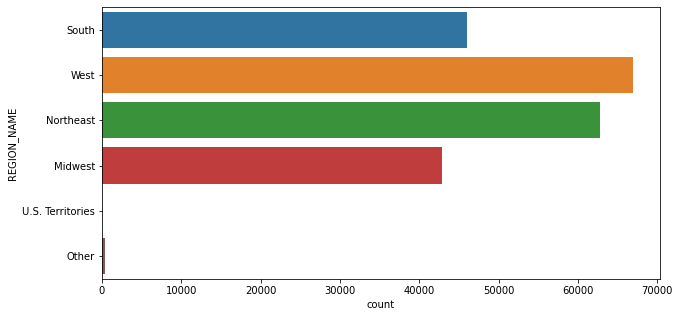

In [108]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=hc_df, y="REGION_NAME")

<AxesSubplot:xlabel='count', ylabel='OFFENDER_RACE'>

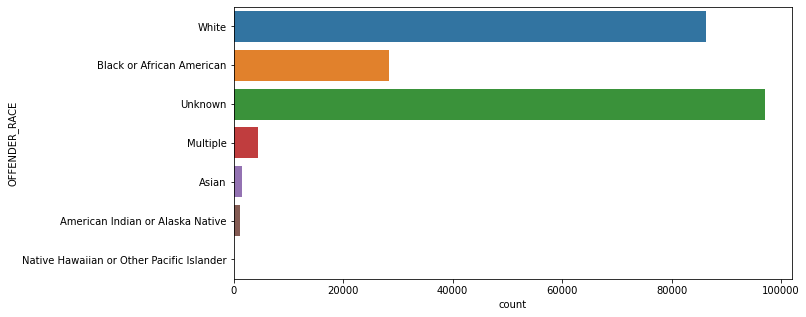

In [107]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=hc_df, y="OFFENDER_RACE")

<AxesSubplot:xlabel='count', ylabel='OFFENDER_ETHNICITY'>

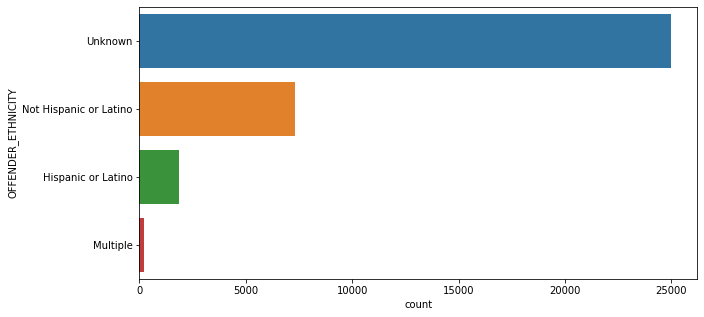

In [106]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=hc_df, y="OFFENDER_ETHNICITY")

<AxesSubplot:xlabel='count', ylabel='DATA_YEAR'>

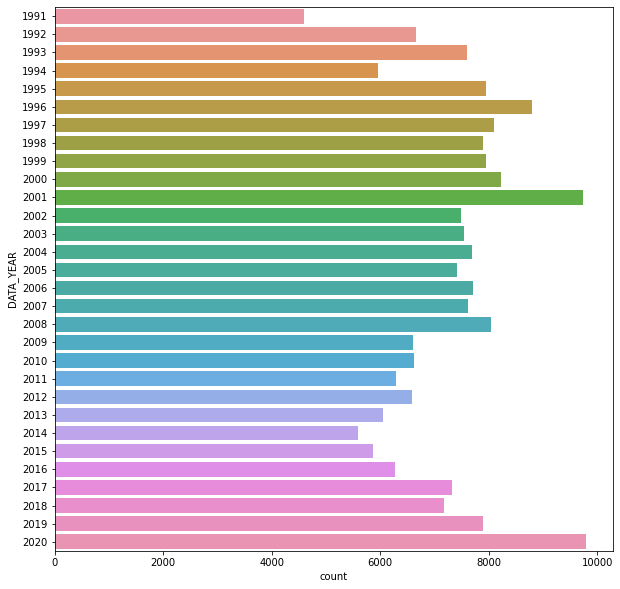

In [92]:
fig = plt.figure(figsize=(10,10))
sns.countplot(data=hc_df, y="DATA_YEAR")


<AxesSubplot:xlabel='MULTIPLE_OFFENSE', ylabel='count'>

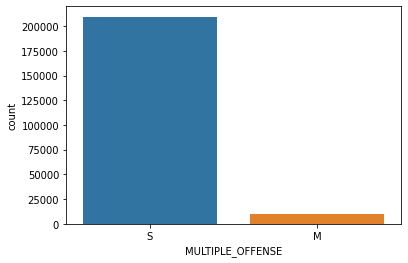

In [55]:
sns.countplot(data=hc_df, x="MULTIPLE_OFFENSE")

<AxesSubplot:xlabel='MULTIPLE_BIAS', ylabel='count'>

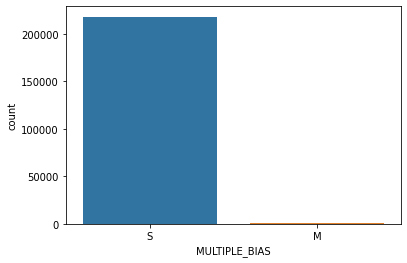

In [105]:
sns.countplot(data=hc_df, x="MULTIPLE_BIAS")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='REGION_NAME'>

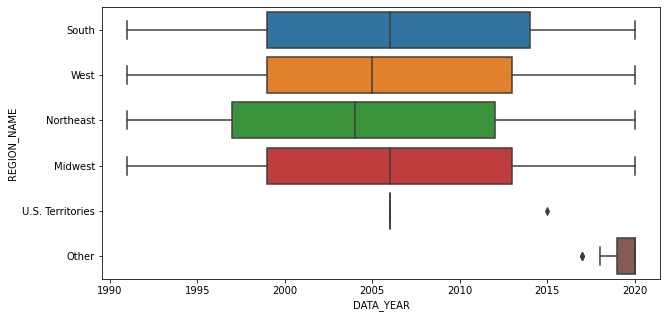

In [103]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=hc_df, x="DATA_YEAR", y="REGION_NAME")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='OFFENDER_RACE'>

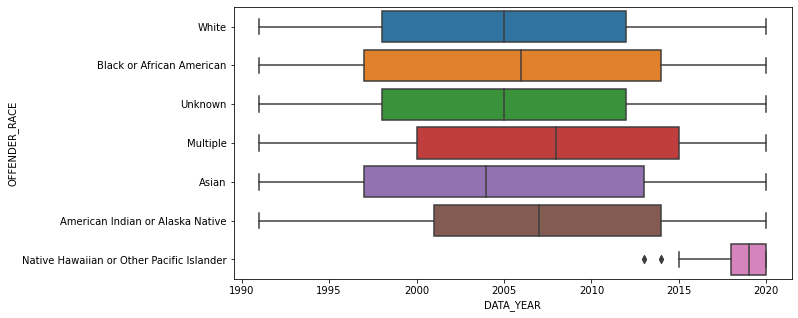

In [102]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=hc_df, x="DATA_YEAR", y="OFFENDER_RACE")

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='REGION_NAME'>

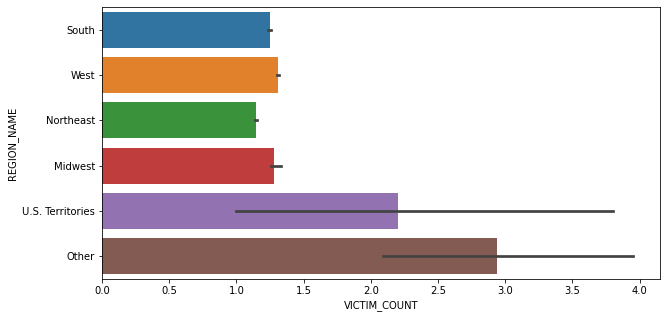

In [101]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=hc_df, x="VICTIM_COUNT", y="REGION_NAME")

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='OFFENDER_RACE'>

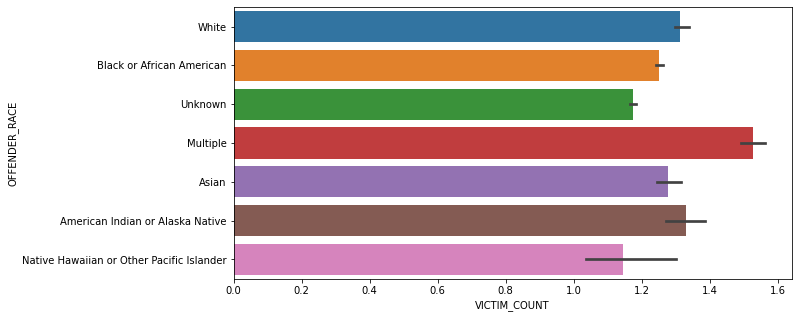

In [100]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=hc_df, x="VICTIM_COUNT",y="OFFENDER_RACE")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='VICTIM_COUNT'>

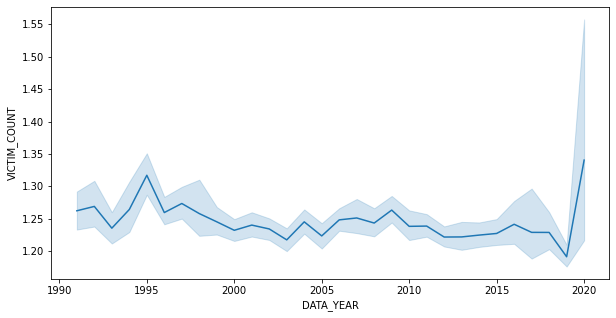

In [99]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=hc_df, x="DATA_YEAR", y="VICTIM_COUNT")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='ADULT_VICTIM_COUNT'>

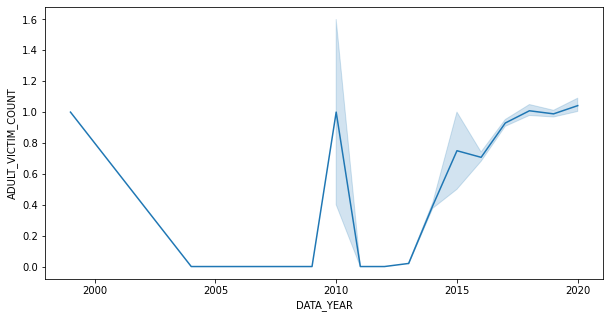

In [98]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=hc_df, x="DATA_YEAR", y="ADULT_VICTIM_COUNT")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='JUVENILE_VICTIM_COUNT'>

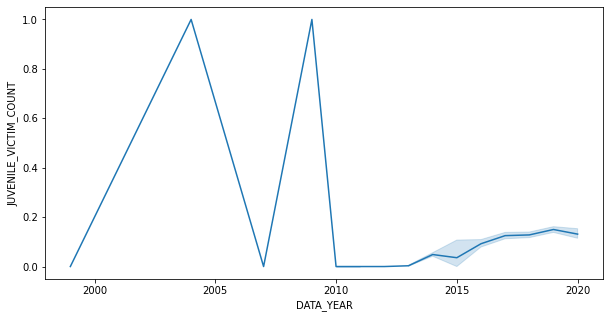

In [97]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=hc_df, x="DATA_YEAR", y="JUVENILE_VICTIM_COUNT")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='TOTAL_OFFENDER_COUNT'>

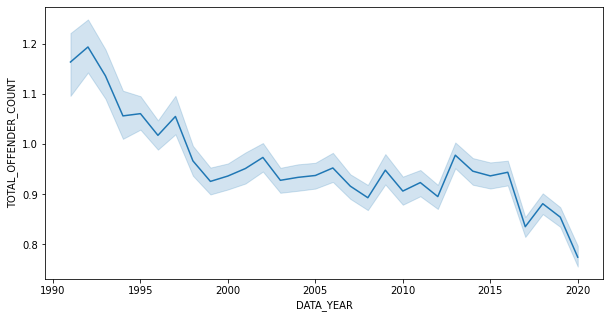

In [95]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=hc_df, x="DATA_YEAR", y="TOTAL_OFFENDER_COUNT")

<AxesSubplot:xlabel='DATA_YEAR', ylabel='TOTAL_INDIVIDUAL_VICTIMS'>

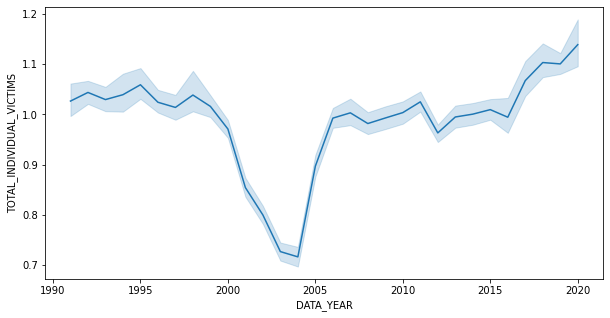

In [96]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=hc_df, x="DATA_YEAR", y="TOTAL_INDIVIDUAL_VICTIMS")